In [1]:
# Training Set Size's effect
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def save_fig(fname):
    os.makedirs(os.path.dirname(fname), exist_ok=True)
    plt.savefig(fname)

In [3]:
data = {
    'MRPC': {
        'size': [25, 50, 75, 100],
        'acc': [81.957, 85.436, 85.016, 87.666],
        'auc': [70.47256, 52.77617, 47.46326, 33.8545],
        'rpp': [6.508, 5.977, 4.96, 3.699],
    },
    'QNLI': {
        'size': [25, 50, 75, 100],
        'acc': [88.907, 89.932, 90.847, 91.561],
        'auc': [195.13559, 180.88697, 126.86783, 111.89274],
        'rpp': [1.837, 1.705, 1.303, 1.158],
    },
    'MNLI': {
        'size': [25, 50, 75, 100],
        'acc': [81.049, 82.975, 83.698, 84.931],
        'auc': [705.27404, 577.23827, 545.68004, 514.83107],
        'rpp': [3.225, 2.738, 2.613, 2.552],
    },
}

In [4]:
def plot(axis, data, **kw_args):
    axis.plot(data['size'], data['acc'], '.-', label='Acc')
    axis.set_xticks([25,50,75,100])
    axis.set_title(kw_args['title'])
    if kw_args['left']:
        axis.set_ylabel('Acc (%)')
    
    auc_axis = axis.twinx()
    auc_axis.plot(data['size'], data['auc'], '.-', color='orange', label='AUC')
    if kw_args['right']:
        auc_axis.set_ylabel('AUC')
    
#     rpp_axis = axis.twinx()
#     rpp_axis.spines["right"].set_position(("axes", 1.3))
#     rpp_axis.plot(data['size'], data['rpp'], color='green', label='RPP')
#     if kw_args['middle']:
#         rpp_axis.set_ylabel('RPP')
    
    if kw_args['left']:
#         axis.set_xlabel('Percentage of Training Set Used')
        axis.legend()
        auc_axis.legend()

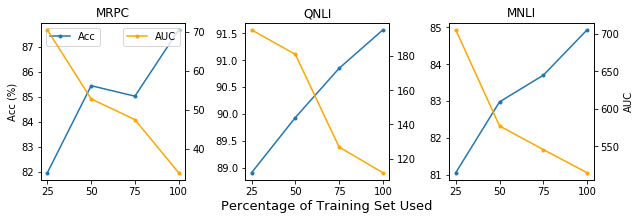

In [5]:
datasets = ['MRPC', 'QNLI', 'MNLI']

fig, axes = plt.subplots(1, len(datasets), figsize=[3*len(datasets), 3])

for i, ds in enumerate(datasets):
    plot(axes[i], data[ds], title=ds, left=(i==0), right=(i==len(datasets)-1))

fig.text(0.51, 0.01, 'Percentage of Training Set Used', ha='center', fontsize=13)
# fig.text(0.01, 0.5, 'Risk', va='center', rotation=90, fontsize=13)

plt.tight_layout(rect=[0.0, 0.02, 1, 1])
save_fig('figs/tss.pdf')